In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
from taxi_pakage import *

In [2]:
taxi = pd.read_csv('edited_taxi.csv')
feature_n, features = get_features(taxi)

In [3]:
test = dmatrix("{}".format(features), taxi, return_type ="dataframe")
test = test.drop(["id", "store_and_fwd_flag", "holiday_Fri"], axis = 1)
# test = test.drop(["dropoff_longitude", "dropoff_latitude", 
#                       "pickup_longitude", "pickup_latitude"], axis =1) - 얘네 넣는게 낫다는 말이 있어서 넣었습니다.

In [16]:
feature_n, features = get_features(test, 2, -3, scale=True)
feature_n, features

(9,
 'scale(passenger_count) + scale(pickup_longitude) + scale(pickup_latitude) + scale(dropoff_longitude) + scale(dropoff_latitude) + scale(dist) + scale(pick_date) + scale(pick_time) + scale(drop_time)')

In [17]:
model =  sm.OLS.from_formula("trip_duration ~ C(vendor_id) +C(weekday) + C(holiday) + {} + 0".format(features), data=test)
result = model.fit()

In [18]:
test, Dropped = erase_outlier_np(result, test, feature_n, dropped=True)
model =  sm.OLS.from_formula("trip_duration ~ C(vendor_id) +C(weekday) + C(holiday) + {} + 0".format(features), data=test)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                 1.357e+05
Date:                Thu, 08 Mar 2018   Prob (F-statistic):               0.00
Time:                        23:52:14   Log-Likelihood:            -1.0825e+07
No. Observations:             1456375   AIC:                         2.165e+07
Df Residuals:                 1456357   BIC:                         2.165e+07
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(vendor_id)[1.0]          802.2756      1.048    765.348      0.000     800.221     804.330
C(vendor_id)[2.0]          802.4625      1.031    778.235      0.000     800.441     804.483
C(weekday)[T.1.0]           62.2087      1.334     46.639      0.000      59.594      64.823
C(weekday)[T.2.0]           86.8402      1.323     65.644      0.000      84.247      89.433
C(weekday)[T.3.0]           94.0122      1.311     71.696      0.000      91.442      96.582
C(weekday)[T.4.0]           78.5344      1.285     61.100      0.000      76.015      81.054
C(weekday)[T.5.0]           76.9367      2.404     32.007      0.000      72.225      81.648
C(weekday)[T.6.0]           14.7501      2.424      6.084      0.000       9.998      19.502
C(holiday)[T.1.0]          -86.3535      2.275    -37.961      0.000     -90.812     -81.895
scale(passenger_count)       5.1751      0.354     14.618      0.000       4.481       5.869
scale(pickup_longitude)    -20.9405      0.401    -52.216      0.000     -21.727     -20.154
scale(pickup_latitude)      27.8330      0.395     70.469      0.000      27.059      28.607
scale(dropoff_longitude)   -33.8604      0.376    -90.164      0.000     -34.596     -33.124
scale(dropoff_latitude)    -42.2452      0.384   -110.106      0.000     -42.997     -41.493
scale(dist)                532.0769      0.434   1226.628      0.000     531.227     532.927
scale(pick_date)            28.5455      0.342     83.346      0.000      27.874      29.217
scale(pick_time)           -39.9019      0.939    -42.501      0.000     -41.742     -38.062
scale(drop_time)            67.5827      0.939     71.963      0.000      65.742      69.423
==============================================================================
Omnibus:                   784286.453   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         22084704.742
Skew:                           2.051   Prob(JB):                         0.00
Kurtosis:                      21.631   Cond. No.                         16.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# scale된 dist와 좌표값4개를 같이 넣어도 컨디션이 0.1만 증가함

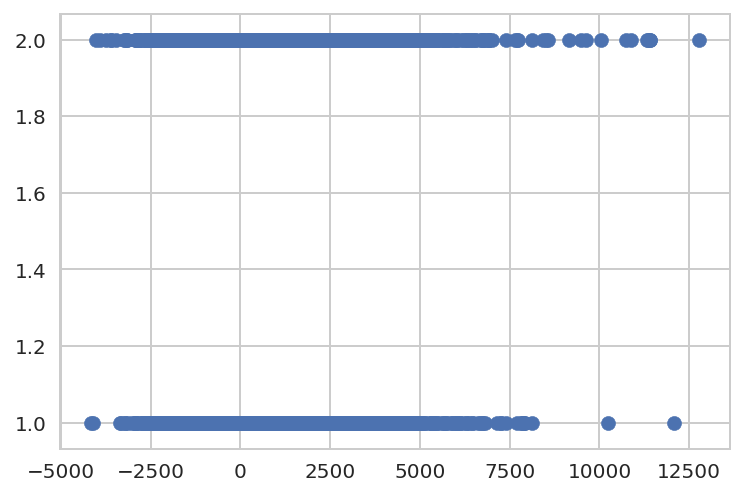

In [30]:
plt.scatter(result.resid, test['vendor_id'])
plt.show()

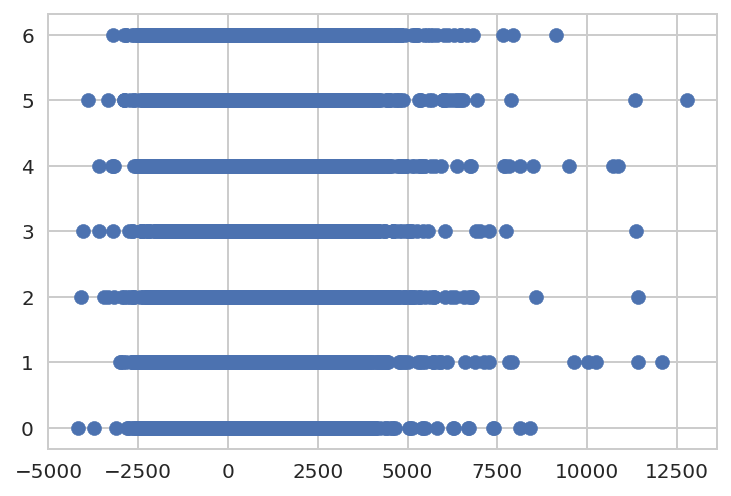

In [28]:
plt.scatter(result.resid, test['weekday'])
plt.show()

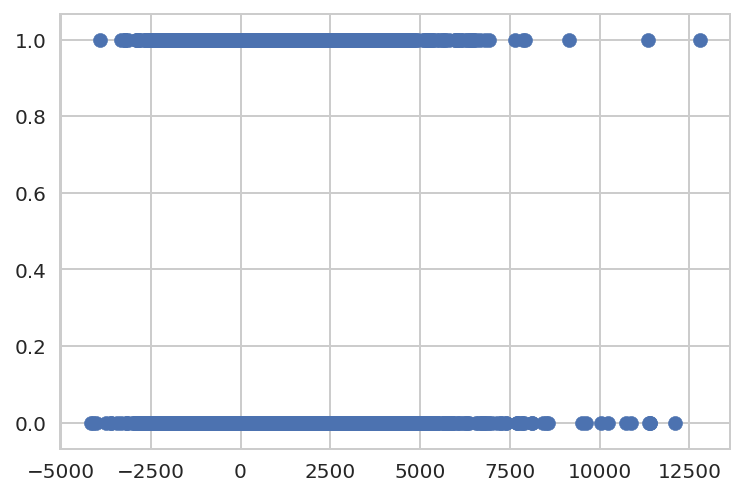

In [29]:
plt.scatter(result.resid, test['holiday'])
plt.show()

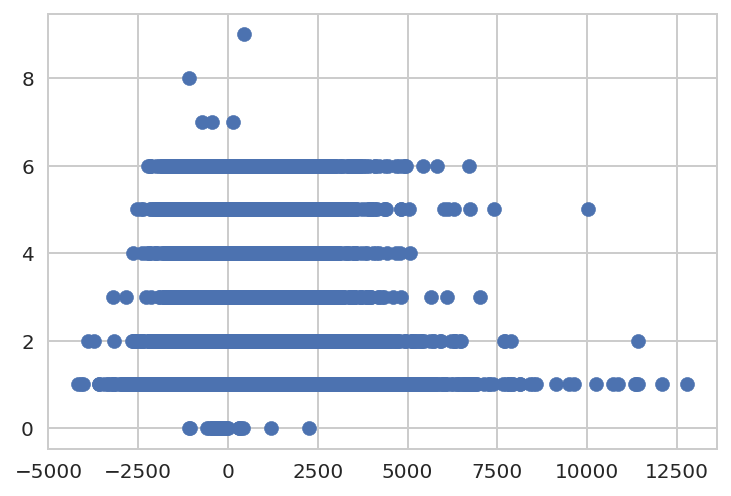

In [22]:
plt.scatter(result.resid, test['passenger_count'])
plt.show()

위 4개는 카테고리거나, 카테고리와 다를바 없는 features

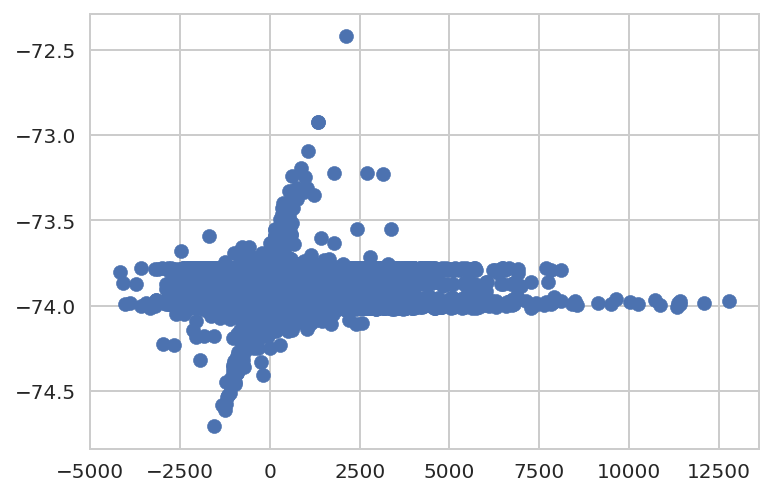

In [24]:
plt.scatter(result.resid, test['pickup_longitude'])
plt.show()

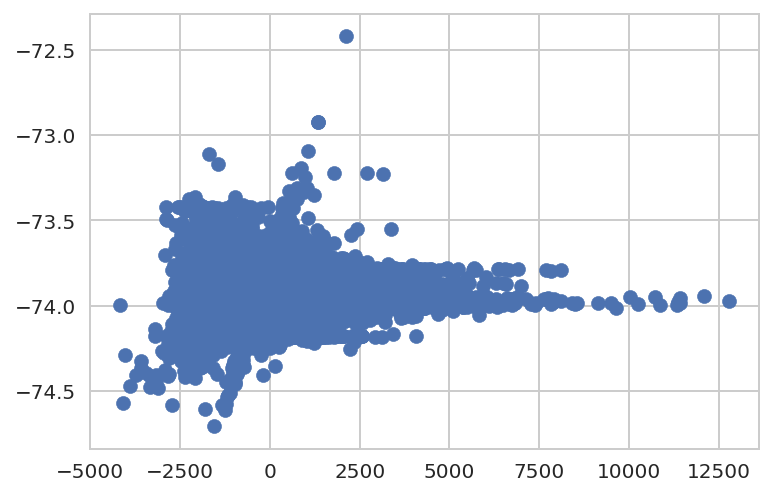

In [25]:
plt.scatter(result.resid, test['dropoff_longitude'])
plt.show()

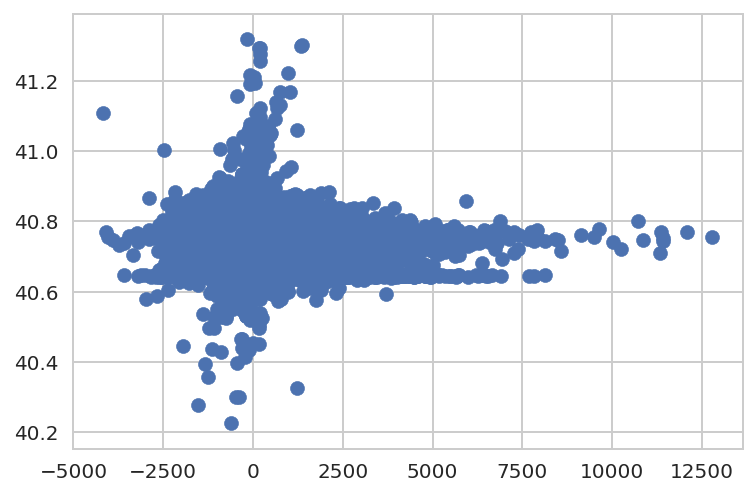

In [26]:
plt.scatter(result.resid, test['pickup_latitude'])
plt.show()

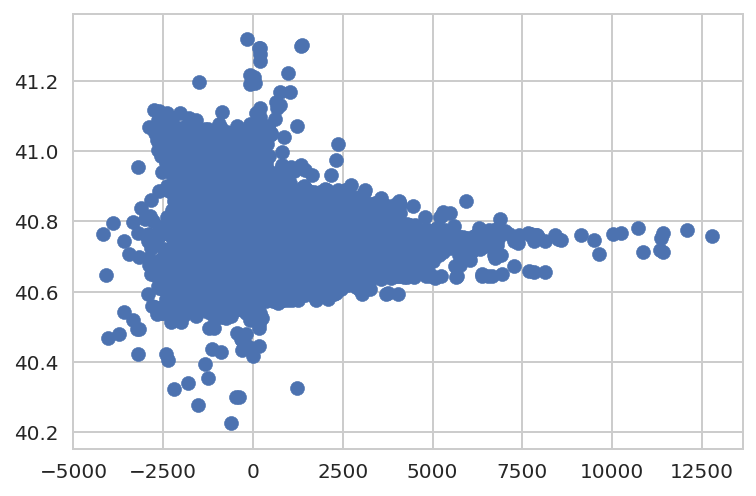

In [27]:
plt.scatter(result.resid, test['dropoff_latitude'])
plt.show()

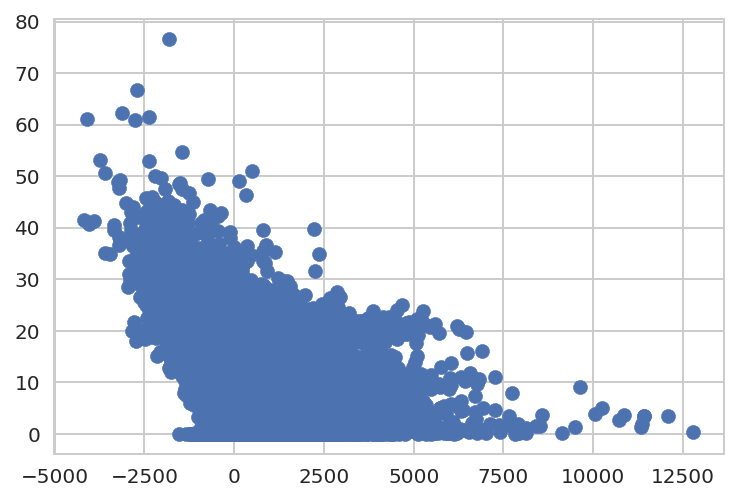

In [19]:
plt.scatter(result.resid, test['dist'])
plt.show()

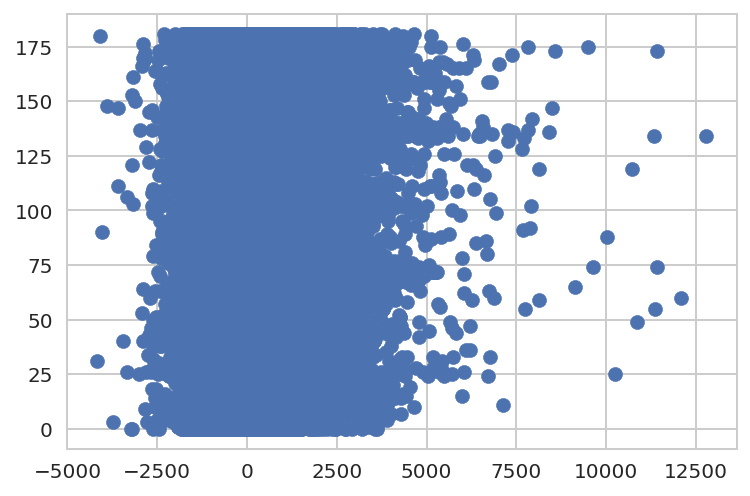

In [20]:
plt.scatter(result.resid, test['pick_date'])
plt.show()

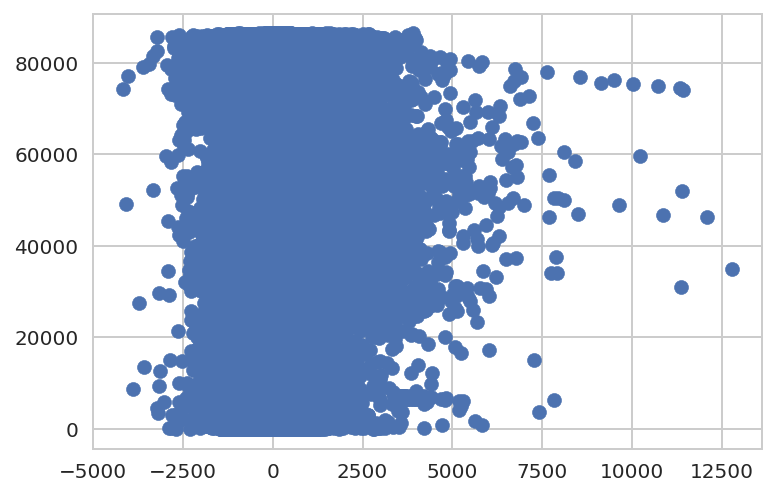

In [21]:
plt.scatter(result.resid, test['pick_time'])
plt.show()

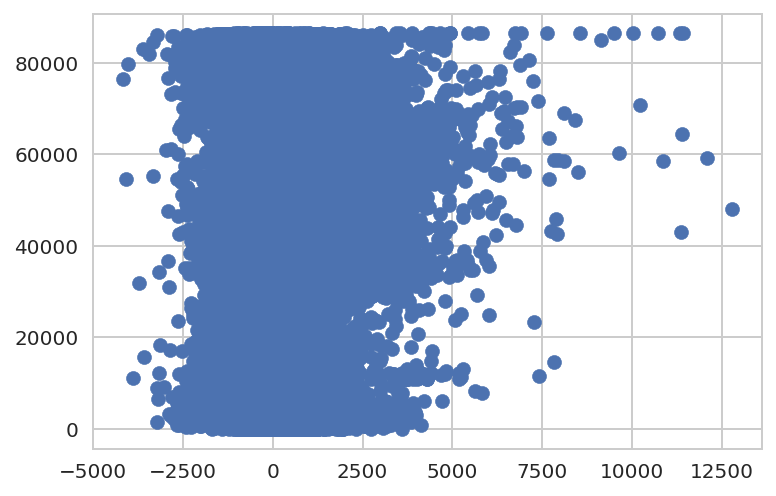

In [23]:
plt.scatter(result.resid, test['drop_time'])
plt.show()